# Análisis Estadístico de la Variable 'Resultado'
Usando carga manual desde archivo CSV

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("ResultadosSabanetaSaber11_estudio_estadistica_1.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          583 non-null    int64 
 1   Sector       583 non-null    object
 2   Colegio      583 non-null    object
 3   Código DANE  583 non-null    int64 
 4   Indicador    583 non-null    object
 5   Resultado    583 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 27.5+ KB
None
Primeras filas del dataset
    Año   Sector                       Colegio   Código DANE  \
0  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
1  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
2  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
3  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
4  2016  Público  I.E. Adelaida Correa Estrada  105631000050   

                               Indicador  Resultado  
0         Establecimie


Valores faltantes por columna:
Año            0
Sector         0
Colegio        0
Código DANE    0
Indicador      0
Resultado      0
dtype: int64


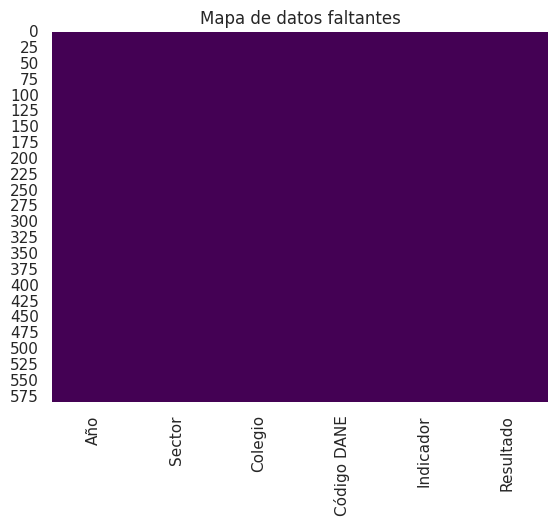

In [78]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()


Número de filas después de eliminar datos faltantes: 583

Datos faltantes por columna después de la limpieza:
Año            0
Sector         0
Colegio        0
Código DANE    0
Indicador      0
Resultado      0
dtype: int64


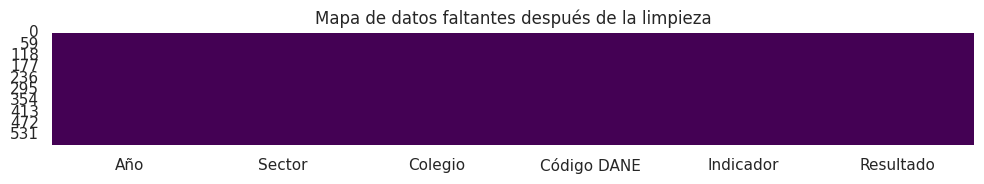

In [79]:
# 3. Eliminar filas con datos faltantes y verificar limpieza

# Eliminar filas con datos faltantes
df_filtrado = df.dropna()

# Mostrar el número de filas después de la limpieza
print(f"\nNúmero de filas después de eliminar datos faltantes: {df_filtrado.shape[0]}")

# Identificar y mostrar el número de datos faltantes por columna
faltantes = df_filtrado.isnull().sum()
print("\nDatos faltantes por columna después de la limpieza:")
print(faltantes)

# Visualizar el mapa de calor de datos faltantes (debería estar vacío si la limpieza fue exitosa)
plt.figure(figsize=(10, 2))
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes después de la limpieza")
plt.tight_layout()
# plt.savefig("mapa_datos_faltantes.png") # Quitar comentario si se quiere guardar la figura
plt.show()

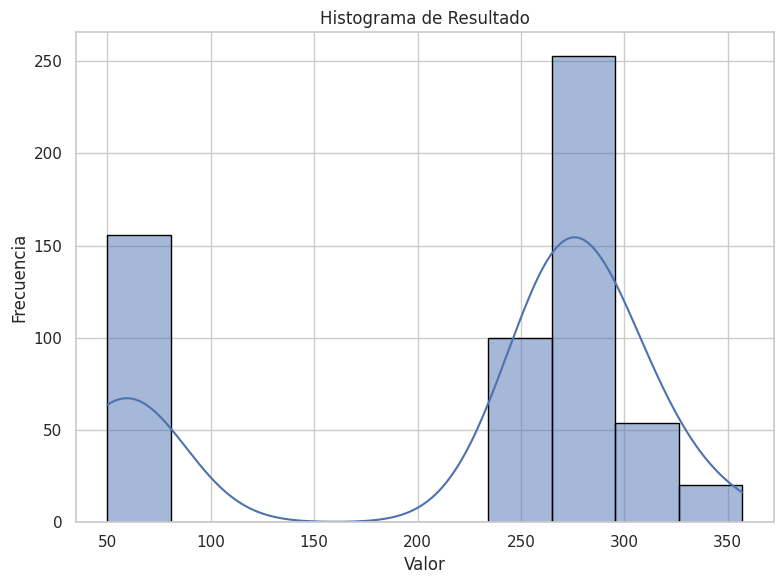

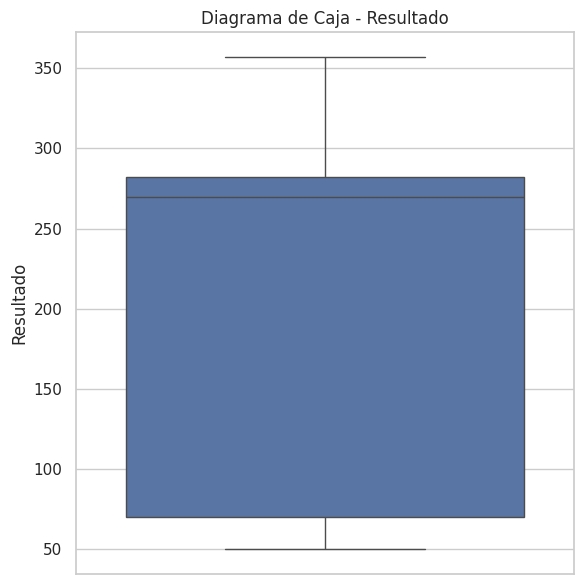

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para Resultado
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Resultado'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Resultado')
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Diagrama de caja para Resultado
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['Resultado'])
plt.title('Diagrama de Caja - Resultado')
plt.tight_layout()
plt.show()


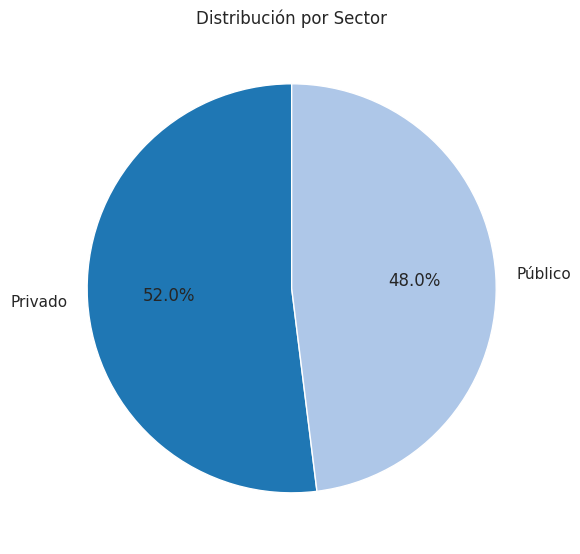

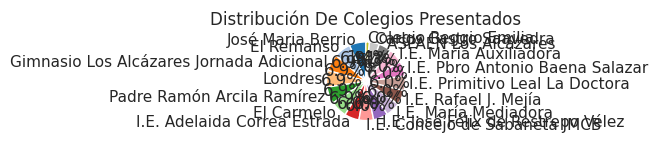

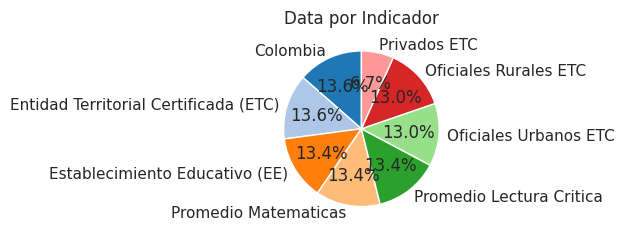

In [81]:
import matplotlib.pyplot as plt

# Lista de variables categóricas y títulos para los gráficos
categorical_vars = [

    ('Sector', 'Distribución por Sector'),
    ('Colegio', 'Distribución De Colegios Presentados'),

    ('Indicador', 'Data por Indicador')
]

for var, title in categorical_vars:
    plt.figure(figsize=(6, 6))
    df_filtrado[var].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(title)
    plt.ylabel('')  # Eliminar la etiqueta del eje y
    plt.tight_layout()
    plt.show()

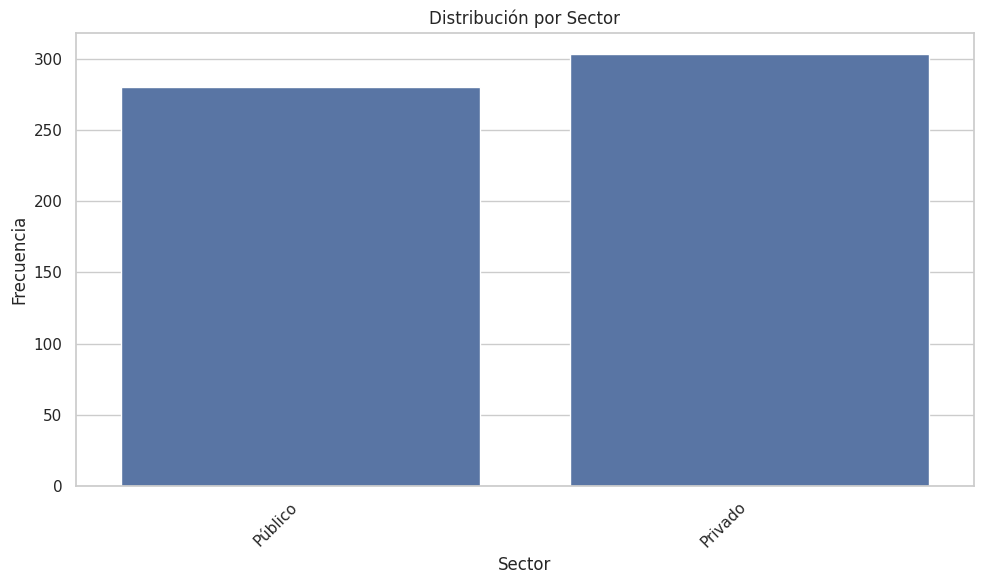

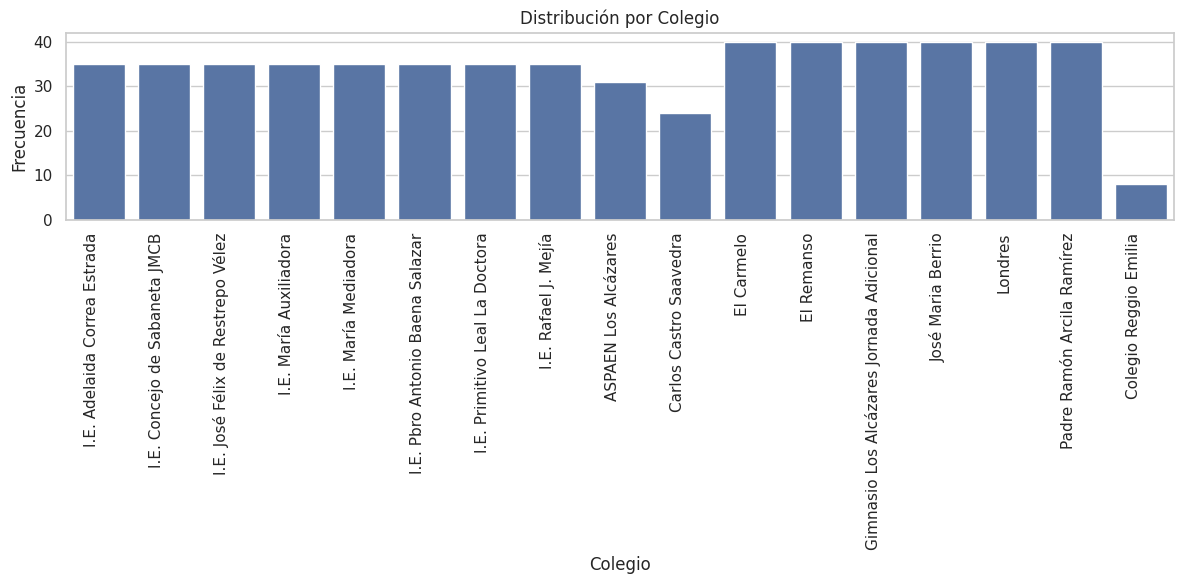

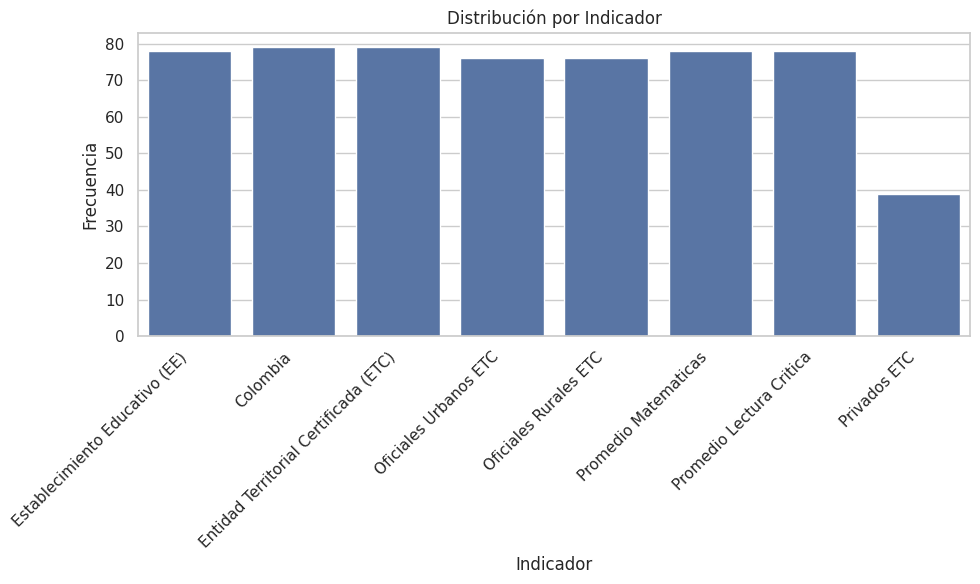

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for Sector
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtrado, x='Sector')
plt.title('Distribución por Sector')
plt.xlabel('Sector')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Mejora la legibilidad de las etiquetas
plt.tight_layout()
plt.show()

# Countplot for Colegio
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado, x='Colegio')
plt.title('Distribución por Colegio')
plt.xlabel('Colegio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right')  # Rotate labels for better visibility
plt.tight_layout()
plt.show()

# Countplot for Indicador
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtrado, x='Indicador')
plt.title('Distribución por Indicador')
plt.xlabel('Indicador')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Mejora la legibilidad de las etiquetas
plt.tight_layout()
plt.show()

In [83]:
# Calcular Q1, Q3 e IQR para la variable 'Resultado'
Q1_resultado = df_filtrado['Resultado'].quantile(0.25)
Q3_resultado = df_filtrado['Resultado'].quantile(0.75)
IQR_resultado = Q3_resultado - Q1_resultado

# Definir los límites para considerar un dato como atípico en 'Resultado'
limite_inferior_resultado = Q1_resultado - 1.5 * IQR_resultado
limite_superior_resultado = Q3_resultado + 1.5 * IQR_resultado

# Filtrar el DataFrame para eliminar outliers en 'Resultado'
df_sinatipicos = df_filtrado[
    (df_filtrado['Resultado'] >= limite_inferior_resultado) & (df_filtrado['Resultado'] <= limite_superior_resultado)
]

# Mostrar la cantidad de datos restantes
print(f"Número de datos restantes después de eliminar outliers en 'Resultado': {len(df_sinatipicos)}")

Número de datos restantes después de eliminar outliers en 'Resultado': 583


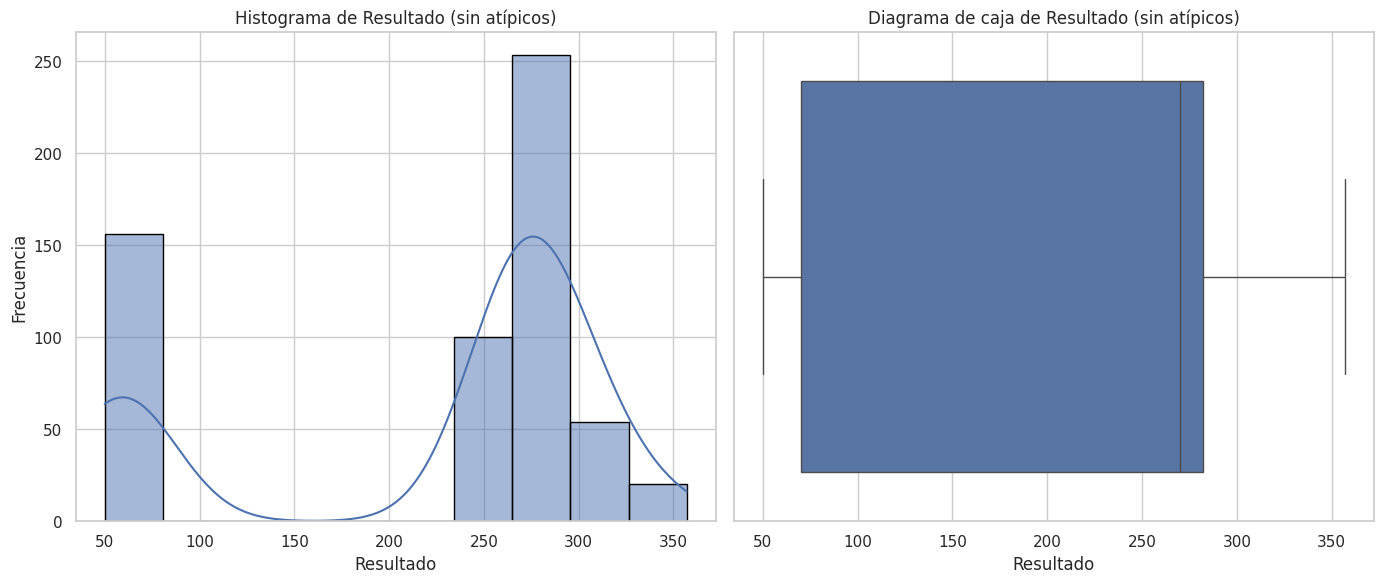

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma para Resultado sin atípicos
sns.histplot(df_sinatipicos['Resultado'], bins=10, edgecolor='black', kde=True, ax=axes[0])
axes[0].set_xlabel('Resultado')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de Resultado (sin atípicos)')

# Diagrama de caja para Resultado sin atípicos
sns.boxplot(x=df_sinatipicos['Resultado'], ax=axes[1])
axes[1].set_xlabel('Resultado')
axes[1].set_title('Diagrama de caja de Resultado (sin atípicos)')

plt.tight_layout()
plt.show()

Resultados de los tests de normalidad (valores p):

Variable: Resultado
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 80.5745, Crítico (5%): 0.7820
  Jarque-Bera p = 0.0000
  → NO es distribución normal (según mayoría de tests)



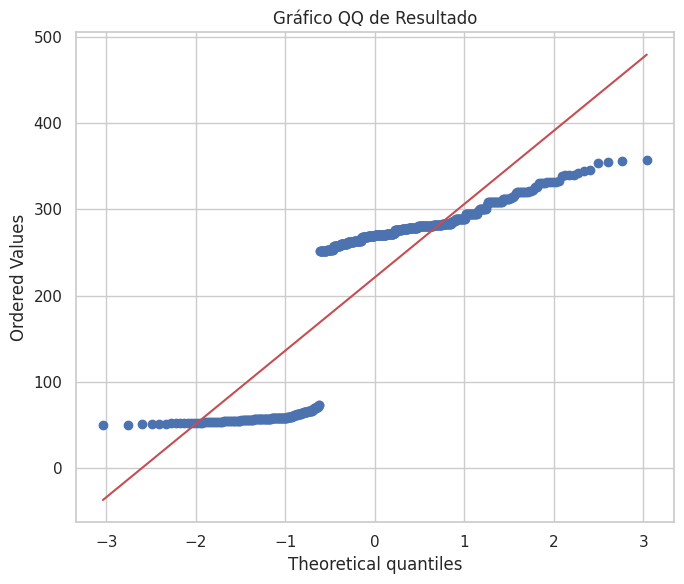

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot

# List of variable to evaluate
columnas_a_evaluar = ['Resultado']

# Dictionary to store results
resultados_normalidad = {}

# Evaluate each variable
for col in columnas_a_evaluar:
    if col in df_sinatipicos.columns: # Use df_sinatipicos after outlier removal
        datos = df_sinatipicos[col].dropna()
        # Shapiro-Wilk
        stat_sw, p_sw = shapiro(datos)
        # Kolmogorov-Smirnov
        media, desv = np.mean(datos), np.std(datos)
        stat_ks, p_ks = kstest(datos, "norm", args=(media, desv))
        # Anderson-Darling
        resultado_ad = anderson(datos)
        stat_ad = resultado_ad.statistic
        crit_ad = resultado_ad.critical_values[2]  # 5%
        ad_normal = stat_ad < crit_ad
        # Jarque-Bera
        stat_jb, p_jb = jarque_bera(datos)
        # Store results
        resultados_normalidad[col] = {
            'Shapiro-Wilk': p_sw,
            'Kolmogorov-Smirnov': p_ks,
            'Anderson-Darling': f'Estadístico: {stat_ad:.4f}, Crítico (5%): {crit_ad:.4f}',
            'Jarque-Bera': p_jb,
            'Normal': sum([
                p_sw > 0.05,
                p_ks > 0.05,
                ad_normal,
                p_jb > 0.05
            ]) >= 3
        }

# Display results in a table
print("Resultados de los tests de normalidad (valores p):\n")
for var, res in resultados_normalidad.items():
    print(f"Variable: {var}")
    print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk']:.4f}")
    print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov']:.4f}")
    print(f"  Anderson-Darling {res['Anderson-Darling']}")
    print(f"  Jarque-Bera p = {res['Jarque-Bera']:.4f}")
    if res['Normal']:
        print("  → Distribución normal (según mayoría de tests)\n")
    else:
        print("  → NO es distribución normal (según mayoría de tests)\n")

# QQ plots for each variable
fig, axes = plt.subplots(1, 1, figsize=(7, 6)) # Changed to 1 subplot
for i, col in enumerate(columnas_a_evaluar):
    if col in df_sinatipicos.columns:
        probplot(df_sinatipicos[col].dropna(), dist="norm", plot=axes) # Plot on the single axes
        axes.set_title(f"Gráfico QQ de {col}")
plt.tight_layout()
plt.show()

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          583 non-null    int64 
 1   Sector       583 non-null    object
 2   Colegio      583 non-null    object
 3   Código DANE  583 non-null    int64 
 4   Indicador    583 non-null    object
 5   Resultado    583 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 27.5+ KB
None
Primeras filas del dataset
    Año   Sector                       Colegio   Código DANE  \
0  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
1  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
2  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
3  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
4  2016  Público  I.E. Adelaida Correa Estrada  105631000050   

                               Indicador  Resultado  
0         Establecimie

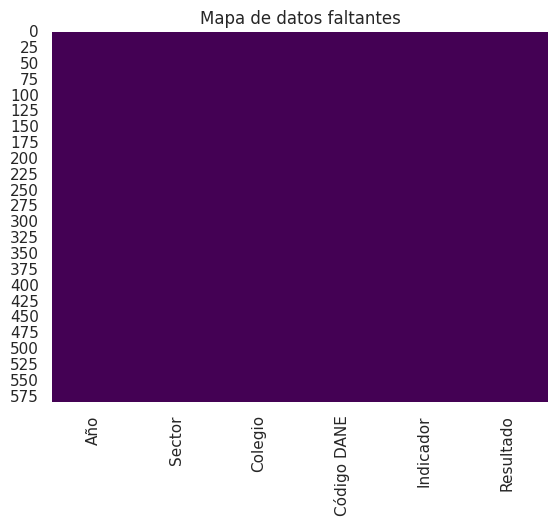


Número de filas después de eliminar datos faltantes: 583

Datos faltantes por columna después de la limpieza:
Año            0
Sector         0
Colegio        0
Código DANE    0
Indicador      0
Resultado      0
dtype: int64


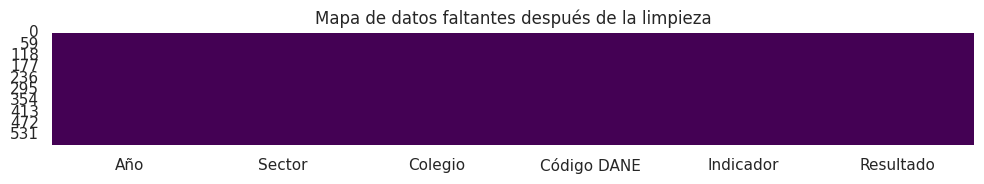

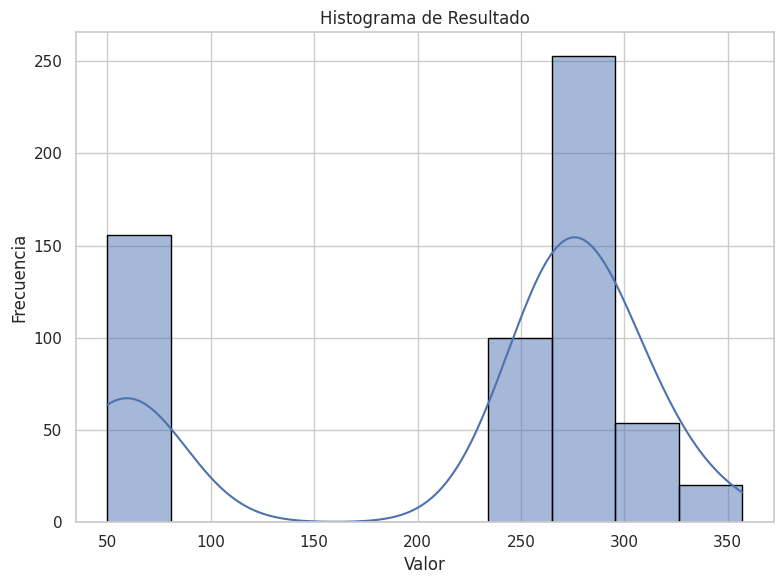

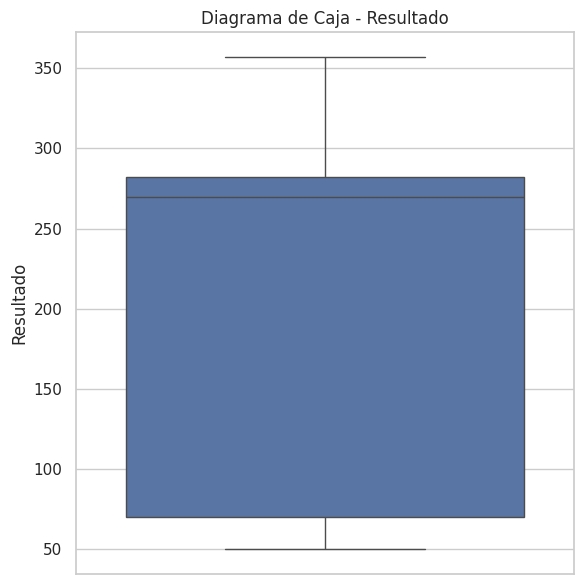

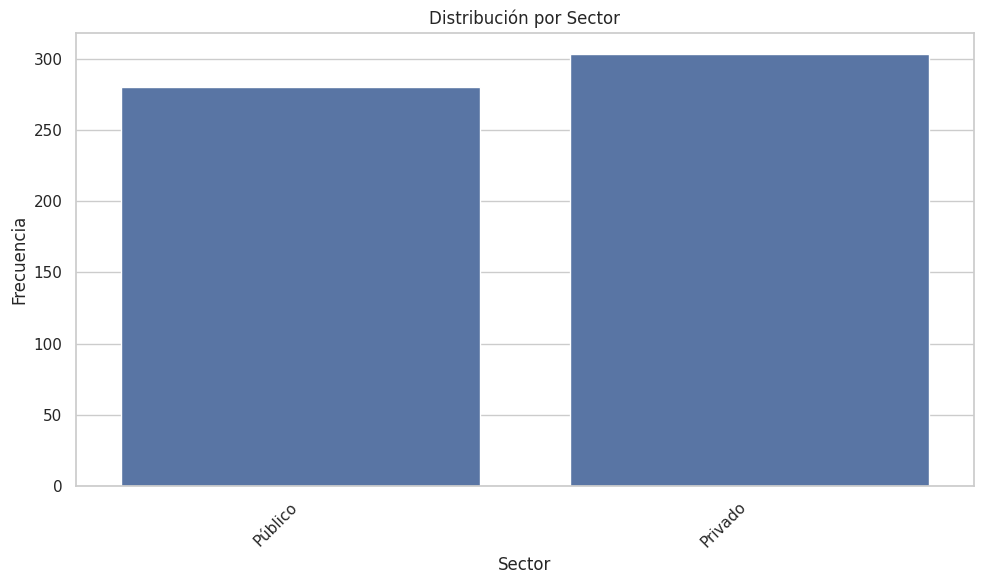

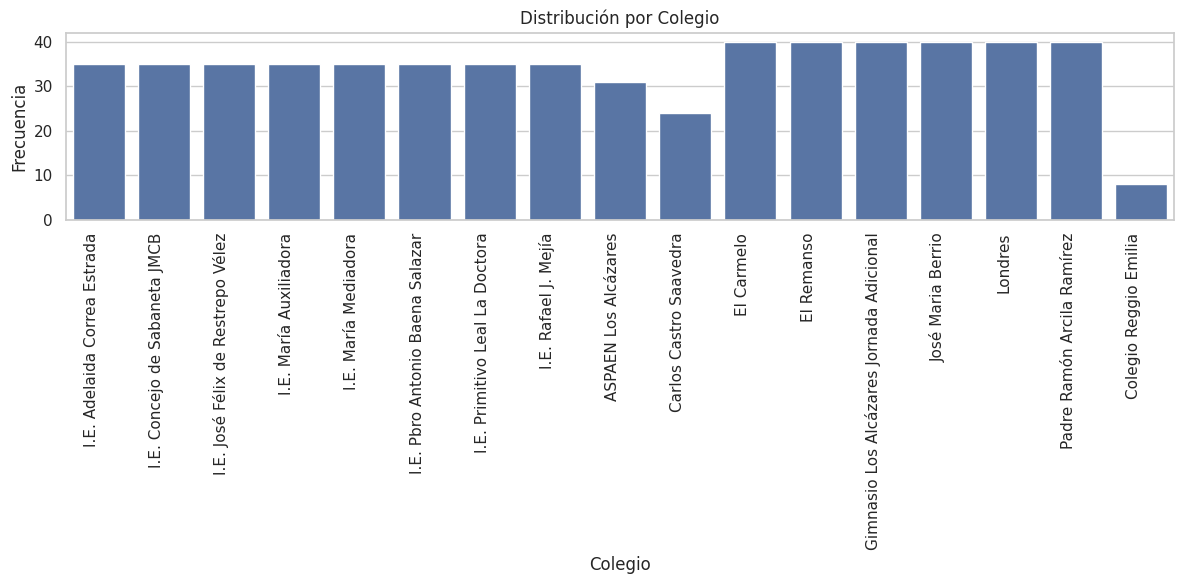

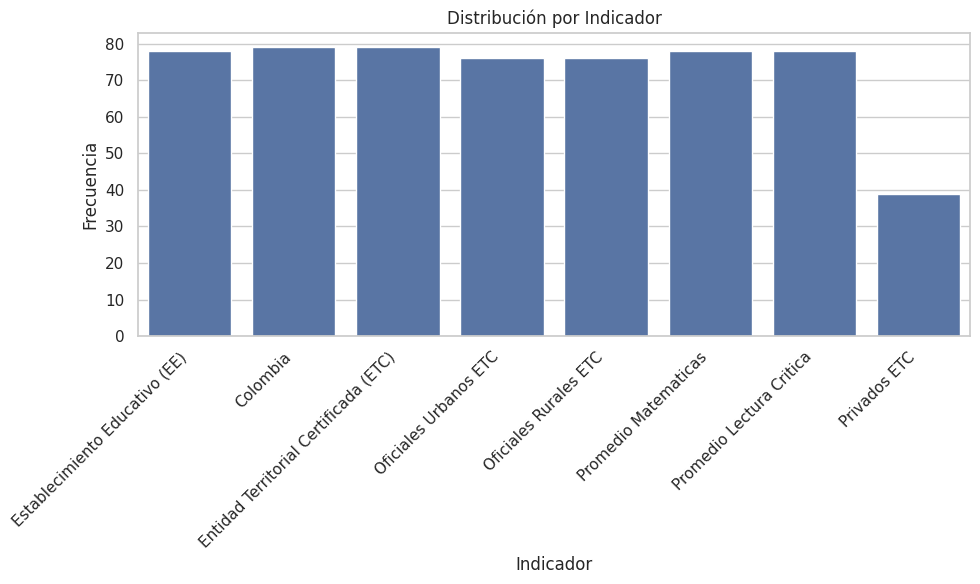

Número de datos restantes después de eliminar outliers en 'Resultado': 583


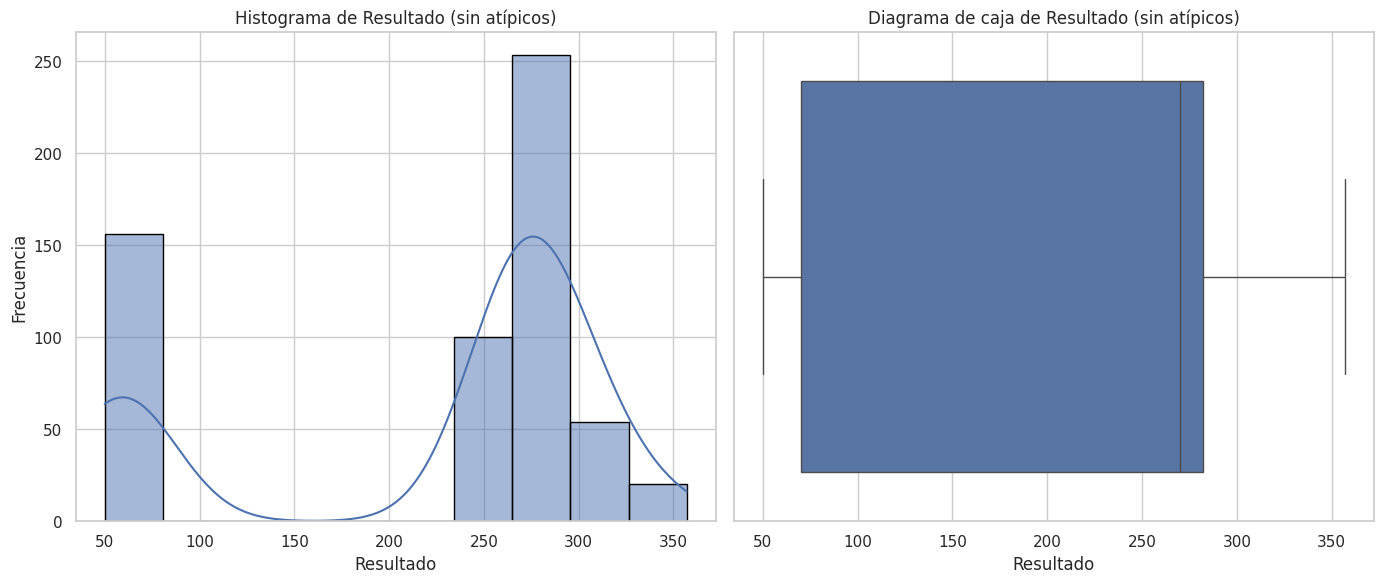

Resultados de los tests de normalidad (valores p):

Variable: Resultado
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 80.5745, Crítico (5%): 0.7820
  Jarque-Bera p = 0.0000
  → NO es distribución normal (según mayoría de tests)



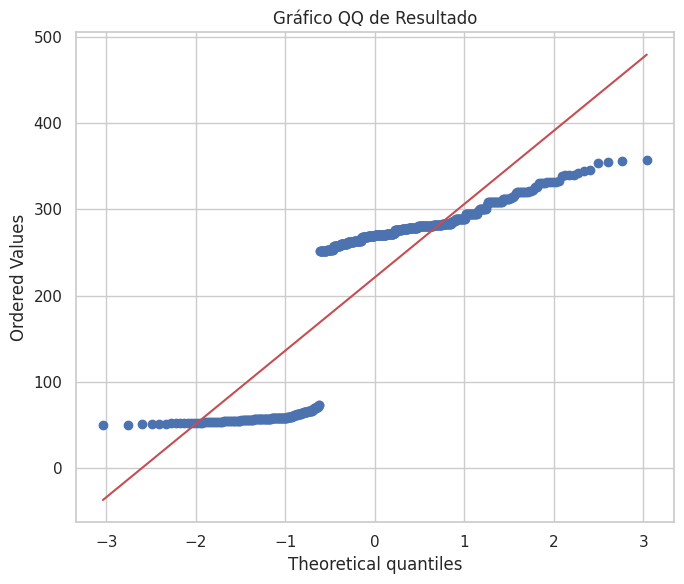

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot

# Cargar archivo CSV
df = pd.read_csv("ResultadosSabanetaSaber11_estudio_estadistica_1.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

# Eliminar filas con datos faltantes y verificar limpieza
# Eliminar filas con datos faltantes
df_filtrado = df.dropna()

# Mostrar el número de filas después de la limpieza
print(f"\nNúmero de filas después de eliminar datos faltantes: {df_filtrado.shape[0]}")

# Identificar y mostrar el número de datos faltantes por columna
faltantes = df_filtrado.isnull().sum()
print("\nDatos faltantes por columna después de la limpieza:")
print(faltantes)

# Visualizar el mapa de calor de datos faltantes (debería estar vacío si la limpieza fue exitosa)
plt.figure(figsize=(10, 2))
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes después de la limpieza")
plt.tight_layout()
# plt.savefig("mapa_datos_faltantes.png") # Quitar comentario si se quiere guardar la figura
plt.show()

# Histograma para Resultado
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Resultado'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Resultado')
plt.tight_layout()
plt.show()

# Diagrama de caja para Resultado
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['Resultado'])
plt.title('Diagrama de Caja - Resultado')
plt.tight_layout()
plt.show()

# Countplot for Sector
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtrado, x='Sector')
plt.title('Distribución por Sector')
plt.xlabel('Sector')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Mejora la legibilidad de las etiquetas
plt.tight_layout()
plt.show()

# Countplot for Colegio
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado, x='Colegio')
plt.title('Distribución por Colegio')
plt.xlabel('Colegio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right')  # Rotate labels for better visibility
plt.tight_layout()
plt.show()

# Countplot for Indicador
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtrado, x='Indicador')
plt.title('Distribución por Indicador')
plt.xlabel('Indicador')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Mejora la legibilidad de las etiquetas
plt.tight_layout()
plt.show()

# Calcular Q1, Q3 e IQR para la variable 'Resultado'
Q1_resultado = df_filtrado['Resultado'].quantile(0.25)
Q3_resultado = df_filtrado['Resultado'].quantile(0.75)
IQR_resultado = Q3_resultado - Q1_resultado

# Definir los límites para considerar un dato como atípico en 'Resultado'
limite_inferior_resultado = Q1_resultado - 1.5 * IQR_resultado
limite_superior_resultado = Q3_resultado + 1.5 * IQR_resultado

# Filtrar el DataFrame para eliminar outliers en 'Resultado'
df_sinatipicos = df_filtrado[
    (df_filtrado['Resultado'] >= limite_inferior_resultado) & (df_filtrado['Resultado'] <= limite_superior_resultado)
]

# Mostrar la cantidad de datos restantes
print(f"Número de datos restantes después de eliminar outliers en 'Resultado': {len(df_sinatipicos)}")

# Histograma para Resultado sin atípicos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_sinatipicos['Resultado'], bins=10, edgecolor='black', kde=True, ax=axes[0])
axes[0].set_xlabel('Resultado')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de Resultado (sin atípicos)')

# Diagrama de caja para Resultado sin atípicos
sns.boxplot(x=df_sinatipicos['Resultado'], ax=axes[1])
axes[1].set_xlabel('Resultado')
axes[1].set_title('Diagrama de caja de Resultado (sin atípicos)')

plt.tight_layout()
plt.show()

# List of variable to evaluate
columnas_a_evaluar = ['Resultado']

# Dictionary to store results
resultados_normalidad = {}

# Evaluate each variable
for col in columnas_a_evaluar:
    if col in df_sinatipicos.columns: # Use df_sinatipicos after outlier removal
        datos = df_sinatipicos[col].dropna()
        # Shapiro-Wilk
        stat_sw, p_sw = shapiro(datos)
        # Kolmogorov-Smirnov
        media, desv = np.mean(datos), np.std(datos)
        stat_ks, p_ks = kstest(datos, "norm", args=(media, desv))
        # Anderson-Darling
        resultado_ad = anderson(datos)
        stat_ad = resultado_ad.statistic
        crit_ad = resultado_ad.critical_values[2]  # 5%
        ad_normal = stat_ad < crit_ad
        # Jarque-Bera
        stat_jb, p_jb = jarque_bera(datos)
        # Store results
        resultados_normalidad[col] = {
            'Shapiro-Wilk': p_sw,
            'Kolmogorov-Smirnov': p_ks,
            'Anderson-Darling': f'Estadístico: {stat_ad:.4f}, Crítico (5%): {crit_ad:.4f}',
            'Jarque-Bera': p_jb,
            'Normal': sum([
                p_sw > 0.05,
                p_ks > 0.05,
                ad_normal,
                p_jb > 0.05
            ]) >= 3
        }

# Display results in a table
print("Resultados de los tests de normalidad (valores p):\n")
for var, res in resultados_normalidad.items():
    print(f"Variable: {var}")
    print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk']:.4f}")
    print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov']:.4f}")
    print(f"  Anderson-Darling {res['Anderson-Darling']}")
    print(f"  Jarque-Bera p = {res['Jarque-Bera']:.4f}")
    if res['Normal']:
        print("  → Distribución normal (según mayoría de tests)\n")
    else:
        print("  → NO es distribución normal (según mayoría de tests)\n")

# QQ plots for each variable
fig, axes = plt.subplots(1, 1, figsize=(7, 6)) # Changed to 1 subplot
for i, col in enumerate(columnas_a_evaluar):
    if col in df_sinatipicos.columns:
        probplot(df_sinatipicos[col].dropna(), dist="norm", plot=axes) # Plot on the single axes
        axes.set_title(f"Gráfico QQ de {col}")
plt.tight_layout()
plt.show()

In [88]:
reporte = """
## Reporte de Análisis Estadístico

Este reporte resume el análisis exploratorio de datos realizado sobre el conjunto de datos de resultados del Saber 11 en Sabaneta.

**Resumen de Datos:**

El conjunto de datos contiene información sobre los resultados del examen Saber 11, incluyendo el año, sector (público/privado), colegio, código DANE, indicador (tipo de resultado, como promedio, lectura crítica, matemáticas, etc.), y el resultado obtenido. El dataset consta de 583 filas y 6 columnas. Se verificó que no hay valores faltantes en el dataset.

**Variables Analizadas:**

Se analizaron las siguientes variables:

*   **Resultado (Numérica):** Variable principal de interés, representando el puntaje obtenido en el examen.
*   **Año (Numérica):** Año en que se presentó el examen.
*   **Sector (Categórica):** Indica si el colegio es público o privado.
*   **Colegio (Categórica):** Nombre del colegio.
*   **Indicador (Categórica):** Tipo específico de resultado que se está considerando.

**Hallazgos Principales:**

*   La variable 'Resultado' presenta una distribución no normal, con una posible bimodalidad, como se observa en el histograma y el gráfico QQ.
*   No se encontraron valores atípicos en la variable 'Resultado' según el método de rango intercuartílico (IQR).
*   La distribución por sector muestra una proporción casi igual de colegios públicos y privados en el dataset.
*   Se visualizó la distribución de datos por colegio e indicador, mostrando la frecuencia de cada categoría.

**Análisis Completado:**

Se completó el análisis exploratorio inicial, que incluyó:

1.  Carga y exploración básica del dataset.
2.  Identificación y manejo de valores faltantes.
3.  Visualización de la distribución de la variable numérica 'Resultado' (histograma y diagrama de caja).
4.  Visualización de la distribución de las variables categóricas 'Sector', 'Colegio' e 'Indicador' (gráficos de barras y pastel).
5.  Identificación y eliminación de valores atípicos en la variable 'Resultado'.
6.  Realización de tests de normalidad y generación de gráfico QQ para la variable 'Resultado'.

**Próximos pasos sugeridos:**

*   Explorar la relación entre la variable 'Resultado' y las variables categóricas ('Año', 'Sector', 'Colegio', 'Indicador') utilizando visualizaciones apropiadas como box plots o violin plots para identificar posibles diferencias en los resultados entre categorías.
*   Considerar la aplicación de transformaciones a la variable 'Resultado' si es necesario para análisis posteriores que asuman normalidad.
*   Realizar análisis más profundos, como análisis de varianza (ANOVA) o pruebas t, para comparar los resultados entre diferentes grupos categóricos.
"""

print(reporte)


## Reporte de Análisis Estadístico

Este reporte resume el análisis exploratorio de datos realizado sobre el conjunto de datos de resultados del Saber 11 en Sabaneta.

**Resumen de Datos:**

El conjunto de datos contiene información sobre los resultados del examen Saber 11, incluyendo el año, sector (público/privado), colegio, código DANE, indicador (tipo de resultado, como promedio, lectura crítica, matemáticas, etc.), y el resultado obtenido. El dataset consta de 583 filas y 6 columnas. Se verificó que no hay valores faltantes en el dataset.

**Variables Analizadas:**

Se analizaron las siguientes variables:

*   **Resultado (Numérica):** Variable principal de interés, representando el puntaje obtenido en el examen.
*   **Año (Numérica):** Año en que se presentó el examen.
*   **Sector (Categórica):** Indica si el colegio es público o privado.
*   **Colegio (Categórica):** Nombre del colegio.
*   **Indicador (Categórica):** Tipo específico de resultado que se está considerando.

**H